In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

---

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Коэф. по формуле k=2.6205388824027653 b=444.1773573243596
Коэффициент корреляции: 0.8874900920739164, r^2=0.7876386635293686
Коэф. матричный способ k=2.6205388824027693 b=444.1773573243595

Коэф. без intercept k=5.889820420132688

Критерий Фишера
df1:1, df2:8
ssf:239984.75798823338, sso:64704.142011766584
msf:239984.75798823338, mso:8088.017751470823
fp:29.67164085966449, ft:5.317655071578714
H1 стат. значима

Красная линия с intercept
Зеленая линия без intercept


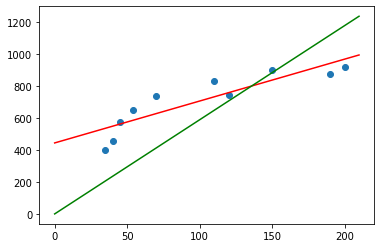

In [2]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)

n = 10

#по формуле
k=(n*(x*y).sum()-x.sum()*y.sum())/(n*(x**2).sum()-(x.sum())**2)
b=(y.sum()*(x**2).sum()-(x*y).sum()*x.sum())/(n*(x**2).sum()-(x.sum())**2)

print(f"Коэф. по формуле k={k} b={b}")

#корреляция
y_=y.sum()/n
r=np.sqrt((((y-y_)**2).sum()-((y-k*x-b)**2).sum())/((y-y_)**2).sum())

print (f"Коэффициент корреляции: {r}, r^2={r**2}")

#матричный способ
XX = np.hstack([np.ones((n, 1)), x[np.newaxis, :].T])
YY = y[np.newaxis, :].T
coef = np.dot(np.linalg.inv(np.dot(XX.T, XX)),XX.T@YY)

print(f"Коэф. матричный способ k={coef[1][0]} b={coef[0][0]}")

#матричный способ без intercept
XX = x[np.newaxis, :].T
YY = y[np.newaxis, :].T
coef = np.dot(np.linalg.inv(np.dot(XX.T, XX)),XX.T@YY)
kk = coef[0][0]

print(f"\nКоэф. без intercept k={kk}")

#Фишер
print("\nКритерий Фишера")
alpha = .05
p = 2
df1 = p - 1
df2 = n - p
y_mean = np.mean(y)
print(f"df1:{df1}, df2:{df2}")
ssf = np.sum(((k * x + b)[:10] - y_mean)**2)
sso = np.sum((y - (k * x + b)[:10])**2)
print(f"ssf:{ssf}, sso:{sso}")
msf = ssf/df1
mso = sso/df2
print(f"msf:{msf}, mso:{mso}")
fp = msf/mso
ft = f.ppf(1 - alpha, df1, df2)
print(f"fp:{fp}, ft:{ft}")
if fp > ft:
    print("H1 стат. значима")
else:
    print("H0 стат. не значима")

#построение графика
X = np.linspace(0, 210, 200)
plt.plot(x,y, marker="o", ls="")
plt.plot(X, k * X + b, c='r')
plt.plot(X, kk * X, c='g')

print("\nКрасная линия с intercept")
print("Зеленая линия без intercept")
plt.show()

---

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [3]:
def mse(b, y, x, n):
    return np.sum((b*x-y)**2)/n

step:0 k=0.25952808 mse=493237.7212546963
step:500 k=5.889815595583751 mse=56516.858416040064
step:1000 k=5.8898204201285544 mse=56516.85841571941
step:1500 k=5.889820420132673 mse=56516.85841571943

Коэф. k=5.889820420132673


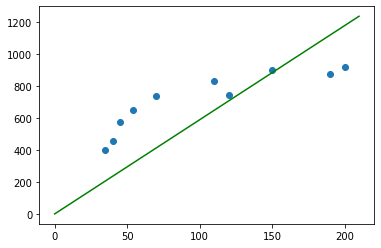

In [4]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

X = np.array(zp)
Y = np.array(ks)

n = 10

speed_learn = 1e-6

k = 0.1

for step in range(2000):
    k -= speed_learn * (2/n) * np.sum((k * X - y)*X)
    if step%500==0:
        print(f"step:{step} k={k} mse={mse(k, Y, X, n)}")

print(f"\nКоэф. k={k}")

#построение графика
X = np.linspace(0, 210, 200)
plt.plot(x,y, marker="o", ls="")
plt.plot(X, kk * X, c='g')

plt.show()